In [1]:
from keys import FTX_API_KEY, FTX_API_SECRET
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility_classes.correlation import Correlation, CSVManager
from utility_classes.historical_data_processor import FTXDataProcessor
import seaborn as sns 
import dateutil.parser as dp
corr = Correlation(perp_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps', spot_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots')

In [2]:

df = pd.read_csv('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/token_borrow_rate.csv')
token_list = df['coin'].to_list()
corr.rank_vol('H', lookback_period = 1000, filter_list = token_list)

NameError: name 'df' is not defined

In [22]:
df_spot = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots/AAVE_historical_data.csv').change_resolution('5T', 'SPOT')
df_perp = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps/AAVE-PERP_historical_data.csv').change_resolution('5T', 'PERP')

df_perp.rename(columns={'open': 'perp_open', 'high': 'perp_high', 'low': 'perp_low',
                                                'close': 'perp_close', 'volume': 'perp_volume', 'vwap': 'perp_vwap'}, inplace=True)
df_spot.rename(columns={'open': 'spot_open', 'high': 'spot_high', 'low': 'spot_low',
                                                'close': 'spot_close', 'volume': 'spot_volume', 'vwap': 'spot_vwap'}, inplace=True)
                      
joint_df = pd.merge(df_perp, df_spot, how='inner', on=['timestamp'])
joint_df['spread'] = (joint_df['perp_vwap'] - joint_df['spot_vwap'])/joint_df['perp_vwap']*100

joint_df['spread']=joint_df['spread'].fillna(joint_df['spread'].tail(3000).mean())


joint_df.drop(columns=['perp_open', 'spot_open', 'perp_high', 'spot_high', 'perp_low', 'spot_low', 'perp_close', 'spot_close'], inplace=True)
joint_df=joint_df.set_index('timestamp')


joint_df.iloc[25000:]

,perp_volume,perp_vwap,spot_volume,spot_vwap,spread
timestamp,,,,,
2021-01-06T17:55:00+00:00,31266.6341,118.235311,0.0000,NaN,0.203540
2021-01-06T18:00:00+00:00,45466.5035,118.245636,0.0000,NaN,0.203540
2021-01-06T18:05:00+00:00,20321.5636,118.271101,1411.1105,117.559212,0.601913
2021-01-06T18:10:00+00:00,6200.8199,118.103173,0.0000,NaN,0.203540
2021-01-06T18:15:00+00:00,121785.3965,117.555634,15.2433,117.474029,0.069418
...,...,...,...,...,...
2021-04-02T23:00:00+00:00,376465.8904,417.250561,16860.9010,416.206136,0.250311
2021-04-02T23:05:00+00:00,469675.9055,418.725641,4372.1613,417.732026,0.237295
2021-04-02T23:10:00+00:00,909585.5165,418.425708,8077.4139,417.026659,0.334360


mean: 0.20353979562999447; std: 0.11285915734523652


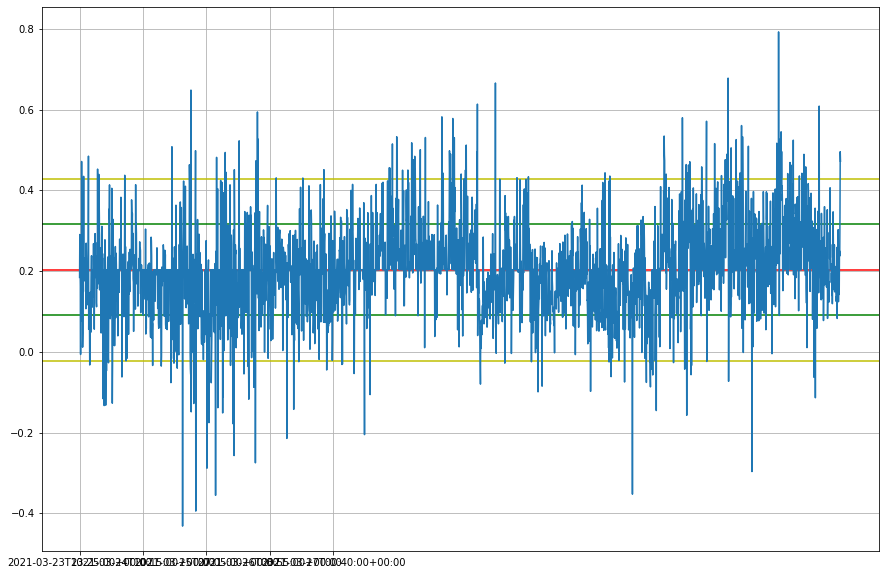

In [23]:
fig, ax = plt.subplofig, ax = plt.subplots(figsize=(15,10))
lookback=3000
spread=joint_df['spread'].tail(lookback)

std=np.std(joint_df['spread'].tail(lookback))

mean = np.mean(joint_df['spread'].tail(lookback))
negative_std = mean-std
positive_std = mean+std


ax.set_xticks([0, 250, 500, 750, 999])
ax.grid()
ax.axhline(y=negative_std, color='green', linestyle='-')
ax.axhline(y=positive_std, color='green', linestyle='-')
ax.axhline(y=mean, color='r', linestyle='-')
ax.axhline(y=mean+2*std, color='y', linestyle='-')
ax.axhline(y=mean-2*std, color='y', linestyle='-')


ax.plot(spread)
print(f'mean: {mean}; std: {std}')

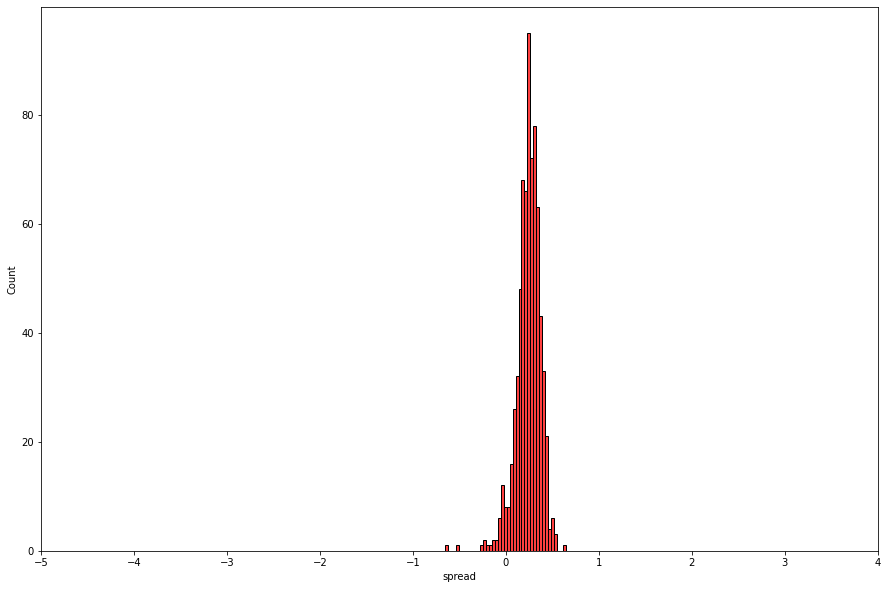

In [23]:
fig, ax = plt.subplots(figsize=(15,10))

sns.histplot(data=spread, color='r')

ax.set_xticks(range(-5,5))

In [7]:
min_std = np.std(joint_df['spread_close%'].tail(72))
min_mean = np.mean(joint_df['spread_close%'].tail(72))
print(min_std, min_mean) 

0.3245789246977592 -0.18331134090893797
